Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


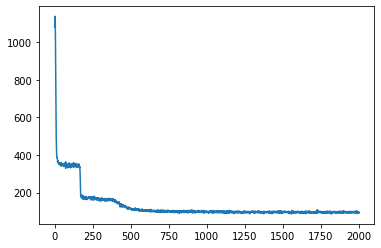

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lr = 1e-4  #1e-2
epoch = int(1e5)
batch_size = 1000

np.random.seed(0)
tf.set_random_seed(0)

def data_load():
    x = np.linspace(-1, 1)
    y = np.linspace(-1, 1)
    
    X, Y = np.meshgrid(x, y)
    noise = np.random.normal(size=X.shape)
    Z = X**2 + Y**2 + noise
    
    X_ = X.reshape((-1,1))
    Y_ = Y.reshape((-1,1)) 
    Z_ = Z.reshape((-1,1)) 
    data = np.concatenate([X_,Y_,Z_], axis=1)
    return data

def shuffle_data(*args):
    idx = np.arange(args[0].shape[0])
    np.random.shuffle(idx)
    list_to_return = []
    for arg in args:
        list_to_return.append(arg[idx])
    return list_to_return

x_data = data_load()

x = tf.placeholder(tf.float32, shape=(None,3)) # (?,3)

W1 = tf.get_variable('W1', (3, 10), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
W2 = tf.get_variable('W2', (10, 10), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
W3 = tf.get_variable('W3', (10, 2), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
W4 = tf.get_variable('W4', (2, 10), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
W5 = tf.get_variable('W5', (10, 10), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())
W6 = tf.get_variable('W6', (10, 3), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())

b1 = tf.get_variable('b1', (10,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
b2 = tf.get_variable('b2', (10,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
b3 = tf.get_variable('b3', (2,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
b4 = tf.get_variable('b4', (10,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
b5 = tf.get_variable('b5', (10,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
b6 = tf.get_variable('b6', (3,), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))

x1 = tf.nn.relu(x@W1+b1) 
x2 = tf.nn.relu(x1@W2+b2) 
z = x2@W3+b3 
x4 = tf.nn.relu(z@W4+b4) 
x5 = tf.nn.relu(x4@W5+b5) 
x_ae = x5@W6+b6 

loss = tf.nn.l2_loss(x - x_ae)
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    loss_trace = []
    gradiant_step = -1
    for i in range(epoch):
        x_data_ = np.array(shuffle_data(x_data)).reshape((2500, 3))
        for k in range(int(x_data.shape[0]/batch_size)):
            gradiant_step += 1
            x_batch = x_data_[k * batch_size:(k + 1) * batch_size]
            feed_dict = {x: x_batch}
            if gradiant_step % 100 == 0:
                loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
                loss_trace.append(loss_run) 
            else:
                sess.run(train, feed_dict=feed_dict)
        
plt.plot(loss_trace)
plt.show()